In [53]:
#'DIGIT RECOGNITION'
import pandas as pda

import numpy as np

trn_df = pda.DataFrame(pda.read_csv('usps_train.csv'))

val_df = pda.DataFrame(pda.read_csv('usps_valid.csv'))

tst_df = pda.DataFrame(pda.read_csv('usps_test.csv'))

y_trn = trn_df.iloc[:,0]

X_trn = trn_df.iloc[:,1:]

y_tst = tst_df.iloc[:,0]

X_tst = tst_df.iloc[:,1:]

y_val = val_df.iloc[:,0]

X_val = val_df.iloc[:,1:]

print(np.shape(y_tst),np.shape(X_trn),np.shape(X_val))

(299,) (999, 256) (299, 256)


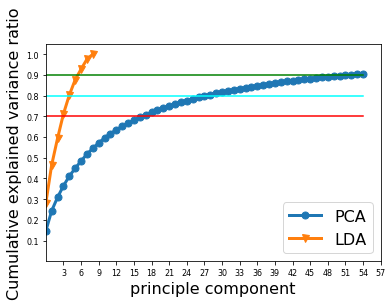

In [54]:
ncomp=55

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

pca = PCA(n_components=ncomp)
pca.fit(X_trn)

lda = LinearDiscriminantAnalysis(solver='svd',n_components=ncomp)
lda.fit(X_trn,y_trn.astype(int)).transform(X_trn) 

lda_cevr=np.cumsum(lda.explained_variance_ratio_)
pca_cevr=np.cumsum(pca.explained_variance_ratio_)

pca_eigval=pca.explained_variance_
pca_eigvec=pca.components_

lda_eigval=pca.explained_variance_
lda_eigvec=pca.components_

xmesh=np.linspace(1,ncomp,ncomp)
lim90=np.zeros(ncomp)+0.9
lim70=np.zeros(ncomp)+0.7
lim80=np.zeros(ncomp)+0.8

plt.figure()

plt.plot(pca_cevr,marker='o', linewidth=3, markersize=7)
plt.plot(lda_cevr,marker='v', linewidth=3, markersize=7)

plt.legend(['PCA','LDA'], fontsize=16)

plt.plot(lim70,color='red')
plt.plot(lim80,color='aqua')
plt.plot(lim90,color='green')

plt.xlim([0,ncomp])
plt.ylim([0.0, 1.05])

plt.xticks([3*i for i in range(1,20)], fontsize=8)
plt.yticks([0.1*i for i in range(1,11)], fontsize=8)

plt.xlabel('principle component', fontsize=16)
plt.ylabel('Cumulative explained variance ratio', fontsize=16)

plt.show()

In [55]:
Kred=dict()
for i in range(ncomp):
    if pca_cevr[i]<=0.700:
        pass
    else:
        Kred[70]=i
        k70 = i
        break
        
for i in range(ncomp):
    if pca_cevr[i]<=0.800:
        pass
    else:
        Kred[80]=i
        k80 = i
        break
        
for i in range(ncomp):
    if pca_cevr[i]<=0.900:
        pass
    else:
        Kred[90]=i
        k90 = i
        break

Lred=dict()
for i in range(9):
    if lda_cevr[i]<=0.700:
        pass
    else:
        Lred[70]=i
        l70 = i
        break
        
for i in range(9):
    if lda_cevr[i]<=0.800:
        pass
    else:
        Lred[80]=i
        l80 = i
        break
        
for i in range(9):
    if lda_cevr[i]<=0.900:
        pass
    else:
        Lred[90]=i
        l90 = i
        break        
        
print('k70->',Kred[70],'\t k80->',Kred[80],'\t k90->',Kred[90])
print('k70->',k70,'\t k80->',k80,'\t k90->',k90)

print('L70->',Lred[70],'\t L80->',Lred[80],'\t L90->',Lred[90])
print('l70->',l70,'\t l80->',l80,'\t l90->',l90)

Xpca_trn=dict()
Xpca_val=dict()
Xpca_tst=dict()

Xlda_trn=dict()
Xlda_val=dict()
Xlda_tst=dict()

Xpca_trn[100]=X_trn
Xpca_tst[100]=X_tst
Xpca_val[100]=X_val

Xlda_trn[100]=X_trn
Xlda_tst[100]=X_tst
Xlda_val[100]=X_val

Xpca_trn[70]= np.transpose([np.dot(X_trn,pca.components_[i]) for i in range(k70)])
Xpca_tst[70]= np.transpose([np.dot(X_tst,pca.components_[i]) for i in range(k70)])
Xpca_val[70]= np.transpose([np.dot(X_val,pca.components_[i]) for i in range(k70)])

Xpca_trn[80]= np.transpose([np.dot(X_trn,pca.components_[i]) for i in range(k80)])
Xpca_tst[80]= np.transpose([np.dot(X_tst,pca.components_[i]) for i in range(k80)])
Xpca_val[80]= np.transpose([np.dot(X_val,pca.components_[i]) for i in range(k80)])

Xpca_trn[90]= np.transpose([np.dot(X_trn,pca.components_[i]) for i in range(k90)])
Xpca_tst[90]= np.transpose([np.dot(X_tst,pca.components_[i]) for i in range(k90)])
Xpca_val[90]= np.transpose([np.dot(X_val,pca.components_[i]) for i in range(k90)])

Xlda_trn[70]= np.transpose([np.dot(X_trn,pca.components_[i]) for i in range(l70)])
Xlda_tst[70]= np.transpose([np.dot(X_tst,pca.components_[i]) for i in range(l70)])
Xlda_val[70]= np.transpose([np.dot(X_val,pca.components_[i]) for i in range(l70)])

Xlda_trn[80]= np.transpose([np.dot(X_trn,pca.components_[i]) for i in range(l80)])
Xlda_tst[80]= np.transpose([np.dot(X_tst,pca.components_[i]) for i in range(l80)])
Xlda_val[80]= np.transpose([np.dot(X_val,pca.components_[i]) for i in range(l80)])

Xlda_trn[90]= np.transpose([np.dot(X_trn,pca.components_[i]) for i in range(l90)])
Xlda_tst[90]= np.transpose([np.dot(X_tst,pca.components_[i]) for i in range(l90)])
Xlda_val[90]= np.transpose([np.dot(X_val,pca.components_[i]) for i in range(l90)])


k70-> 17 	 k80-> 28 	 k90-> 52
k70-> 17 	 k80-> 28 	 k90-> 52
L70-> 3 	 L80-> 4 	 L90-> 6
l70-> 3 	 l80-> 4 	 l90-> 6


All visualisations using imshow

In [56]:
orig_input = dict()
orig_input(i) = np.reshape(X_trn[i],(16,16))
plt.imshow()

print(np.shape(Xred_val[90]),np.shape(Xred_tst[80]),np.shape(Xred_trn[70]))

#print(pca.)
eigdigit=[ sum(pca.components_[i]) for i in range(16)]

plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,20))
cmap = ListedColormap(['#b30065', '#178000'])
for i in range(16):
  plt.imshow(np.reshape(eigendigit[i],(16,16)))

plt.imshow(np.reshape(X[90],(16,16)))
plt.imshow(np.reshape(X[80],(16,16)))
plt.imshow(np.reshape(X[70],(16,16)))
plt.legend(['original','90% variance','80% variance','70% variance'], fontsize=16)
'''

SyntaxError: ignored

Model selection

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

PCA alpha-var% = (0.0001, 70) accuracy 0.8328
PCA alpha-var% = (0.0001, 80) accuracy 0.8829
PCA alpha-var% = (0.0001, 90) accuracy 0.913
PCA alpha-var% = (0.001, 70) accuracy 0.8194
PCA alpha-var% = (0.001, 80) accuracy 0.8896
PCA alpha-var% = (0.001, 90) accuracy 0.9064
PCA alpha-var% = (0.01, 70) accuracy 0.8629
PCA alpha-var% = (0.01, 80) accuracy 0.893
PCA alpha-var% = (0.01, 90) accuracy 0.8963
PCA alpha-var% = (0.1, 70) accuracy 0.8696
PCA alpha-var% = (0.1, 80) accuracy 0.8963
PCA alpha-var% = (0.1, 90) accuracy 0.9231
PCA alpha-var% = (1.0, 70) accuracy 0.8094
PCA alpha-var% = (1.0, 80) accuracy 0.786
PCA alpha-var% = (1.0, 90) accuracy 0.8395


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


AttributeError: ignored

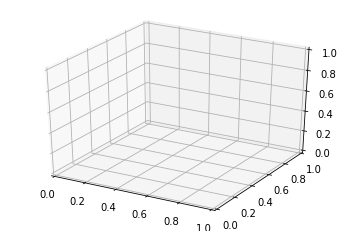

In [76]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

sv_pca_model = dict() 
sv_lda_model = dict() 

val_err_pca = dict()
val_err_lda = dict()
#Val_Err_Mat =[]

for a in np.logspace(-4,0,5):
    for k in [70,80,90,100]:
        sv_pca_model[(a,k)]=SGDClassifier(loss='hinge',penalty='l2',alpha=a).fit(Xpca_trn[k],y_trn)
        sv_lda_model[(a,k)]=SGDClassifier(loss='hinge',penalty='l2',alpha=a).fit(Xlda_trn[k],y_trn)
        val_err_pca[(a,k)] = 1-sv_pca_model[(a,k)].score(Xpca_val[k],y_val)
        val_err_lda[(a,k)] = 1-sv_lda_model[(a,k)].score(Xlda_val[k],y_val)
        #Val_Err_Mat[a][k]=val_err_lda[(a,k)]
        print('PCA','alpha-var% =',(a,k),'accuracy',round(sv_pca_model[(a,k)].score(Xpca_val[k],y_val),4))

minvalerr_pca = min(val_err_pca.values())
#minvalerr_lda = min(val_err_lda.values())

for a in np.logspace(-4,0,5):
    for k in [70,80,90]:
        if val_err_pca[(a,k)] == minvalerr_pca:
            best_pair_pca = (a,k)
        if val_err_lda[(a,k)] == minvalerr_lda:
            best_pair_lda = (a,k)


'''

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(np.logspace(-4,0,5),[70,80,90,100], Val_Err_Mat, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax = plt.axes(projection='3d')
ax.contour3D(np.logspace(-4,0,5),[70,80,90,100], Val_Err_Mat, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
'''


print('Least val_error pair is',best_pair_pca,'with accuracy',round(100*sv_pca_model[best_pair_pca].score(Xpca_tst[best_pair_pca[1]],y_tst),4),'%')

print('w/o feature selection, accuracy on unprojected test set',round(100*SVC().fit(X_trn,y_trn).score(X_tst,y_tst),4),'%','for alpha=',)




Q2) SPECTRAL CLUSTERING

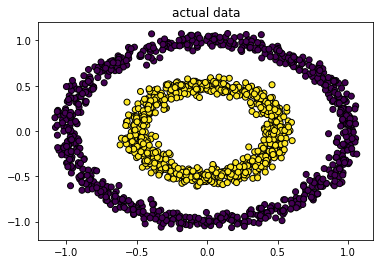

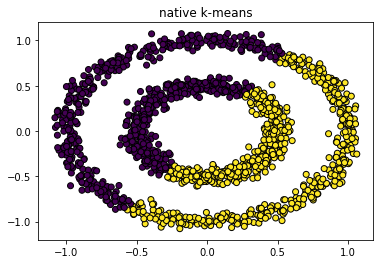

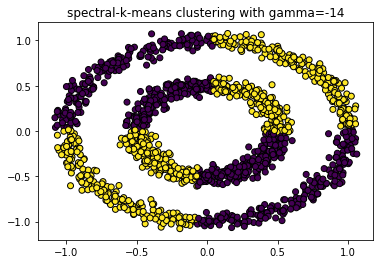

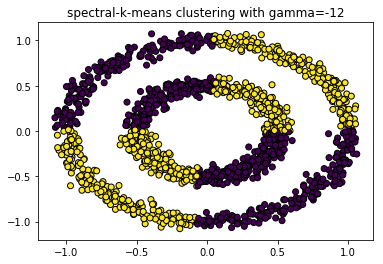

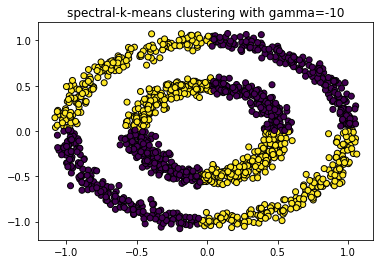

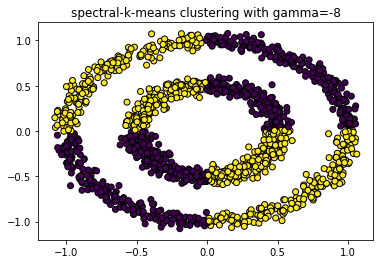

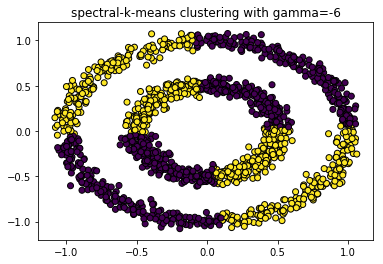

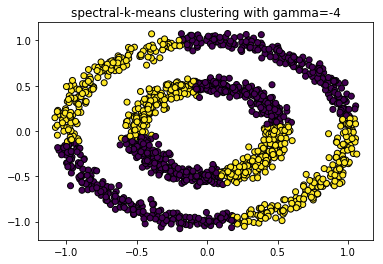

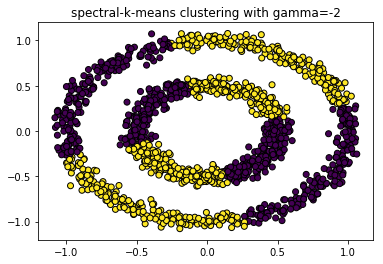

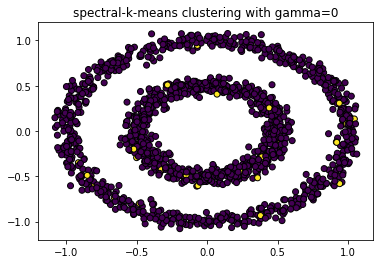

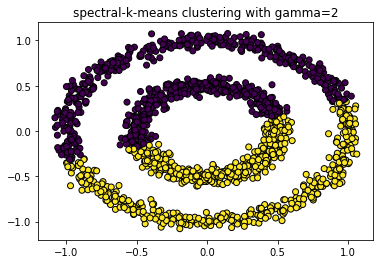

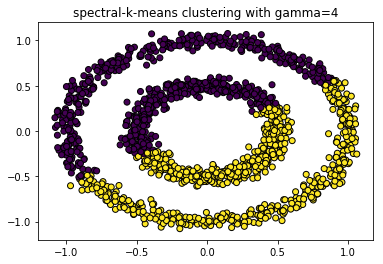

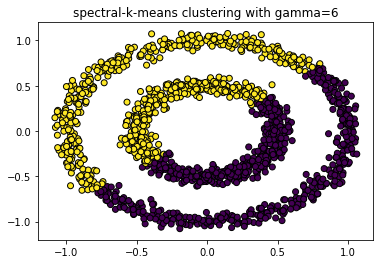

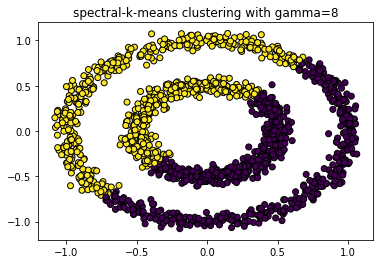

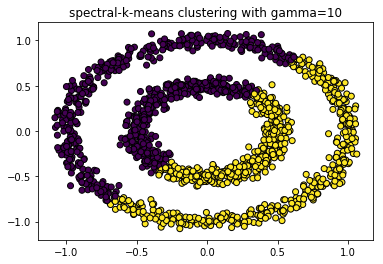

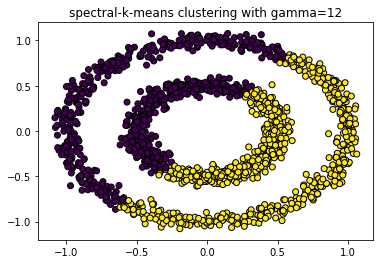

In [26]:
from sklearn import datasets
from numpy import linalg as LA
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

X,y = datasets.make_circles(n_samples=1500, factor=0.5, noise=0.05)
#print(y.shape)

def spectacular_spectral_clustering(X,gamma=0.1):
    simMat=[exp(-gamma*(X[i]-X[j])) for i,j in range(len(X))]
    Lap=np.diagonal(simMat)-simMat
    eigvec, eigval = LA.eig(Lap)
    Sak_specK = KMeans(n_clusters=2).fit(eigvec)
    plt.scatter(X[:, 0], X[:, 1], c=sak_specK.predict(X), edgecolors='k')
    return Sak_specK 
    
cmap = ListedColormap(['#b30065', '#178000'])  
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('actual data')

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=KMeans(n_clusters=2).fit(X).predict(X), edgecolors='k')
plt.title('native k-means')

from sklearn.cluster import SpectralClustering

gamma_values=np.arange(-14,14,2)

for g in gamma_values:
  plt.figure()
  skl_specK_clusters = SpectralClustering(n_clusters=2,gamma=g,affinity='rbf',assign_labels='kmeans').fit(X).labels_
  plt.scatter(X[:, 0], X[:, 1], c=skl_specK_clusters, edgecolors='k')
  plt.title('spectral-k-means clustering with gamma=%d'%g)
  #plt.figure()
  #spectacular_spectral_clustering(X,gamma=g)
  #plt.scatter(X[:, 0], X[:, 1], c=sak_specK.predict(X), edgecolors='k')




[127 127 131 142 157 167 170 169 183 192 202 205 203 204 210 217 216 210
 203 199 192 178 159 145 130 121 115 120 129 128 113  98 110 121 121 108
 104 111 112 104 104 106 108 109 113 118 119 118 117 116 114 112 111 111
 112 112 123 131 137 136 126 115 107 104 113 110 111 114 115 111 110 112
 111 111 110 110 109 109 109 108 110 110 110 110 110 110 110 110 113 112
 110 110 110 110 112 113 110 111 113 115 117 118 118 118 111 111 111 112
 112 113 113 113 111 111 112 112 112 112 112 113 115]


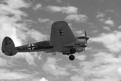

"\nfor g in np.arange(-1,1,0.2):\n  plt.figure()\n  skl_specK_clusters = SpectralClustering(n_clusters=2,gamma=g,affinity='rbf',assign_labels='kmeans').fit(img).labels_\n  plt.scatter(X[:, 0], X[:, 1], c=skl_specK_clusters, edgecolors='k')\n  plt.title('spectral-k-means clustering with gamma=%d'%g)\n"

In [46]:
import cv2 
from google.colab.patches import cv2_imshow
img = cv2.imread('seg.jpg',0) 
print(img[0])
cv2_imshow(img)
'''
for g in np.arange(-1,1,0.2):
  plt.figure()
  skl_specK_clusters = SpectralClustering(n_clusters=2,gamma=g,affinity='rbf',assign_labels='kmeans').fit(img).labels_
  plt.scatter(X[:, 0], X[:, 1], c=skl_specK_clusters, edgecolors='k')
  plt.title('spectral-k-means clustering with gamma=%d'%g)
'''

